Sentiment Analysis on Twitter Data

Importing the required libraries Pandas and NLTK (Natural Language ToolKit)

In [5]:
import pandas as pd

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Reading data from the hyperlink using Pandas

In [6]:
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


### Data Cleaning
Checking the data for null values

In [7]:
Data[Data.tweet.isnull() == True]
Data[Data.label.isnull() == True]
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


Removing Twitter handler (@user)

In [8]:
Data['cleaned_tweetsdata'] = Data.tweet.str.replace('@[^\s]+', '')
Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,cleaned_tweetsdata
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


Removing Special chars from the tweets by str replace method

In [9]:
Data.cleaned_tweetsdata=Data.cleaned_tweetsdata.str.replace('[^\w\s]','')
Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,cleaned_tweetsdata
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuðððððððððâï
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


Removing Numerics from the tweets using str regex of [0-9]



In [10]:
Data.cleaned_tweetsdata=Data.cleaned_tweetsdata.str.replace('[0-9]+', '')
Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,cleaned_tweetsdata
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuðððððððððâï
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


Removing the special characters from tweets 

In [11]:
Data.cleaned_tweetsdata = Data.cleaned_tweetsdata.str.encode("ascii", "ignore").str.decode("utf-8")
Data

,id,label,tweet,cleaned_tweetsdata
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


Downloading the stopwords, and tokenizing them with alpha chars

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

text_s = pd.Series(Data.cleaned_tweetsdata).to_string()
#print(text_s)
#Tokenizing words
text_tokens = word_tokenize(text_s)
#print(text_tokens)
print('\n')

tweet_words = []
for t in text_tokens:
  if t.isalpha():
    tweet_words.append(t.lower())
print(tweet_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'sel', 'thanks', 'for', 'lyft', 'credit', 'i', 'cant', 'use', 'cause', 'they', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'u', 'factsguide', 'society', 'now', 'motivation', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'lea', 'camping', 'tomorrow', 'danny', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams', 'can', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champions', 'clev', 'welcome', 'here', 'im', 'its', 'so', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'fro', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'pul', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'days', 'gettingfed', 'cnn', 'calls', 'michigan', 'middle', 'school', 'build', 'the', 'wa', 'no

Setting the stop words and printing them for verification

In [13]:
stop_words = set(stopwords.words('english'))
print('\n')
print(stop_words)
print('\n')



{'hers', 't', 'your', 'are', 'herself', "you'd", 'after', 'them', 'own', 'should', 'he', 'both', 'who', "didn't", 'ours', 'his', 'against', 'didn', 'him', 'hadn', "don't", 'yourself', 'just', 'because', 'now', 'we', 'my', "you're", 'yours', 'or', 'on', 'a', 'all', 'why', "haven't", "she's", 'whom', 'these', 'then', 'couldn', "hadn't", "hasn't", 'up', 'from', 'here', 'which', 'an', 'nor', 'wouldn', 'will', "you've", "mightn't", 'each', 'our', 'himself', "couldn't", 'do', "that'll", 'how', 'over', 'having', 'once', 'yourselves', 'has', 'mightn', 'll', 'm', 'doesn', 'that', "shouldn't", 'too', 'not', 'between', 's', 'aren', 'themselves', 'off', 'wasn', 'if', 'into', 'ourselves', 'the', 'as', 'during', "mustn't", 'weren', 'theirs', 're', 'down', "wouldn't", 'haven', 'i', "you'll", 'this', 'did', 'is', "weren't", 'isn', 'hasn', "it's", 'd', 'most', 'through', 'am', 'mustn', 'you', 'about', 'they', 'o', 'other', 'in', 'myself', 'was', 'such', 'for', "wasn't", "aren't", 've', 'very', 'than'

Removing stop words from the tokenized tweets and applying steming on the words in the tweets

In [14]:
from nltk.tokenize import WordPunctTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

In [15]:
tkn = WordPunctTokenizer()
lem = WordNetLemmatizer()
snowball = SnowballStemmer("english")

def tknlem(tweet):
  tkn_data = [x for x  in tkn.tokenize(tweet) if len(x) > 1]
  filtered_tweet = [w for w in tkn_data if not w.lower() in stop_words]
  stemmed_words = [snowball.stem(word) for word in filtered_tweet]
  return (" ".join( stemmed_words)).strip()
Data['cleaned_tweetsdata'] = Data['cleaned_tweetsdata'].apply(lambda x: tknlem(x))
Data

,id,label,tweet,cleaned_tweetsdata
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love take time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh templ vandalis calgari wso condemn act


Building the model and predicting the outcome of the new tweets from trained Data

using pipeline Tfidf, LinearSVC and GridSearchCV

In [16]:
import sklearn.model_selection as ms
train_data, test_data = ms.train_test_split(Data, test_size=0.2, random_state=42, shuffle=True)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV

In [18]:
params = {'tfidf__max_df': [0.9, 0.95],'tfidf__ngram_range': [(1,1), (1,2)], "svc__C": [0.001,.01, .1, 1, 10, 100]}

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True, stop_words='english')),
    ("svc", LinearSVC(penalty='l2',dual=False,random_state=0, max_iter=1000,tol=0.01)),
])

gsearch = GridSearchCV(pipeline, params, cv=12, verbose=2, n_jobs=-1) 

#based on cleaned_tweetsdata we are training the model
gsearch.fit(train_data['cleaned_tweetsdata'], train_data['label'])
print(gsearch.best_estimator_)
print(gsearch.best_score_)

Fitting 12 folds for each of 24 candidates, totalling 288 fits
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('svc', LinearSVC(C=10, dual=False, random_state=0, tol=0.01))])
0.9667172464895217


Predicting the model and with F1 Score, Accuracy and sample Test Data

In [21]:
predicted_data = gsearch.predict(test_data['cleaned_tweetsdata'])
sum = 0
for p, y in zip(test_data.label, predicted_data):
  if p == y:
    sum = sum + 1
print('Accuracy: ', sum/len(predicted_data)*100)

from sklearn.metrics import f1_score, accuracy_score
#Printing the F1 Score and the Accuracy score
print('F1 Score : ', f1_score(test_data.label, predicted_data))
print('Accuracy : ',  accuracy_score(test_data.label, predicted_data))

TestData = ['I love Python', 'beautiful', 'black', 'I hate you','Trump']
auth_series = pd.Series(TestData)
frame = { 'Test': auth_series}
result = pd.DataFrame(frame)
result['Test']
print(gsearch.predict(result['Test']))

Accuracy:  96.37103081495385
F1 Score :  0.7211538461538463
Accuracy :  0.9637103081495385
[0 0 1 1 1]


POS Tagging the Tweet words

In [22]:
sample=Data.cleaned_tweetsdata
sample_s = pd.Series(sample.head(10)).to_string()
print(sample_s)
print("\n")
sample_text = word_tokenize(sample_s)
sample_text
tokenized_words = word_tokenize(sample_s)
print(tokenized_words)
for w in tokenized_words:
    tagged_words = nltk.pos_tag(tokenized_words)
print (tagged_words)
print('\n')

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit cant use caus dont offer whe...
2                                       bihday majesti
3                              model love take time ur
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6                                  camp tomorrow danni
7    next school year year exam cant think school e...
8    love land allin cav champion cleveland clevela...
9                                         welcom im gr


['0', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run', '1', 'thank', 'lyft', 'credit', 'cant', 'use', 'caus', 'dont', 'offer', 'whe', '...', '2', 'bihday', 'majesti', '3', 'model', 'love', 'take', 'time', 'ur', '4', 'factsguid', 'societi', 'motiv', '5', 'huge', 'fan', 'fare', 'big', 'talk', 'leav', 'chao', 'pay', 'disput', 'ge', '...', '6', 'camp', 'tomorrow', 'danni', '7', 'next', 'school', 'year', 'year', 'exam', 'cant', 'th

Named Entity Recognition with NLTK

In [ ]:
N_E_R = nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

(S
  0/CD
  father/NN
  dysfunct/JJ
  selfish/JJ
  drag/NN
  kid/NN
  dysfunct/JJ
  run/NN
  1/CD
  thank/NN
  lyft/NN
  credit/NN
  cant/NN
  use/NN
  caus/NN
  dont/NN
  offer/NN
  whe/NN
  .../:
  2/CD
  bihday/JJ
  majesti/VBD
  3/CD
  model/NN
  love/VB
  take/NN
  time/NN
  ur/JJ
  4/CD
  factsguid/NN
  societi/NN
  motiv/VBZ
  5/CD
  huge/JJ
  fan/NN
  fare/NN
  big/JJ
  talk/NN
  leav/VBZ
  chao/JJ
  pay/NN
  disput/NN
  ge/NN
  .../:
  6/CD
  camp/NN
  tomorrow/NN
  danni/VBZ
  7/CD
  next/JJ
  school/NN
  year/NN
  year/NN
  exam/VBP
  cant/NN
  think/VBP
  school/NN
  e/NN
  .../:
  8/CD
  love/NN
  land/NN
  allin/NN
  cav/NN
  champion/NN
  cleveland/NN
  clevela/NN
  .../:
  9/CD
  welcom/NN
  im/NN
  gr/NN)


Pie Chart between the labels which represent the positive and negative tweets

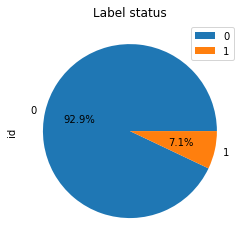

In [ ]:
Data.groupby(['label']).sum().plot(kind='pie', y='id', autopct='%1.1f%%', title='Label status')

Finding the no of words and count occurences for bar graph

In [27]:
Data['no_of_words'] = Data['cleaned_tweetsdata'].apply(lambda x :len(x.split(' ')))
word_count=Data['no_of_words'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


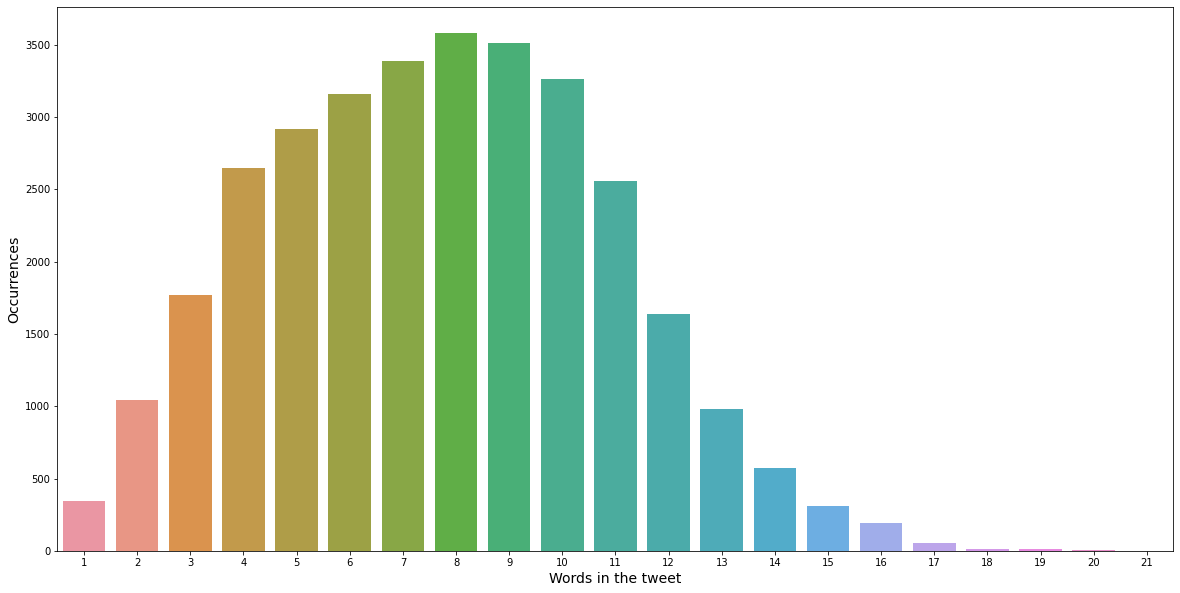

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette()
plt.figure(figsize=(20,10))
sns.barplot(word_count.index, word_count.values)
plt.xlabel('Words in the tweet', fontsize=14)
plt.ylabel('Occurrences', fontsize=14)
plt.show()

Frequency distribution of the tokenized words

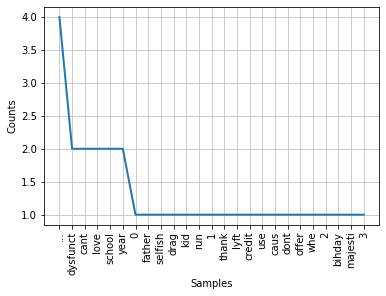

In [29]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)

fdist.most_common(25)
fdist.plot(25)

In [30]:
#Importing required libraries
import numpy as np
import requests
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import requests

Word cloud for the label zero positive sentiments tweets

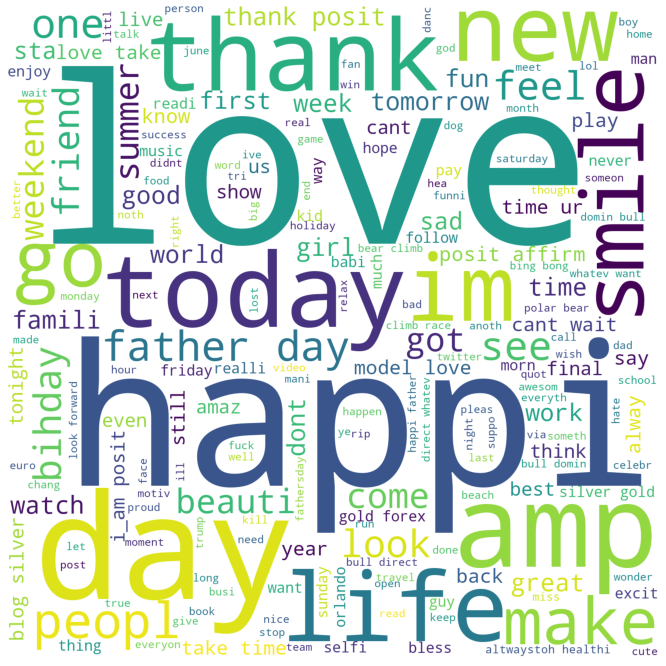

In [31]:
labelzero_positivesentiment =' '.join([tt for tt in Data['cleaned_tweetsdata'][Data['label'] == 0]])
wc1 = WordCloud(background_color='white',width=1500, height=1500, random_state=100).generate(labelzero_positivesentiment)
plt.figure(figsize=(12, 12))
plt.imshow(wc1)
plt.axis('off')
plt.show()

Word cloud for the label zero negative sentiments tweets

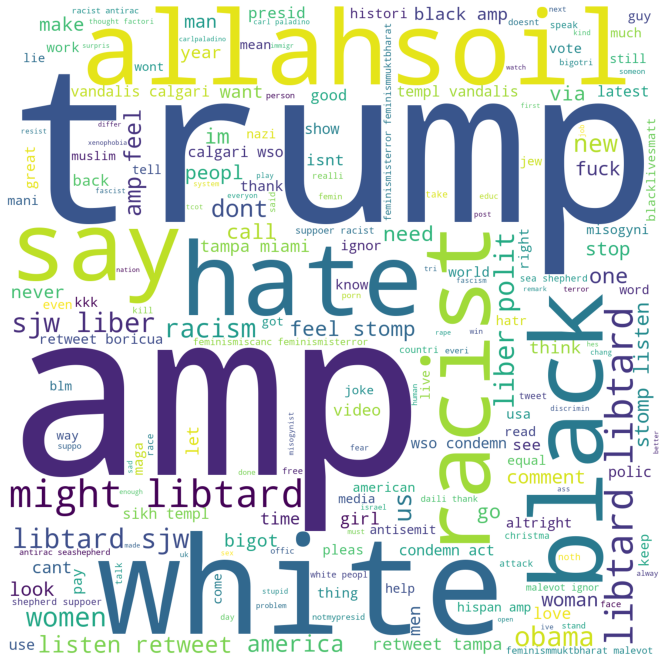

In [32]:
labelzero_negativesentiment =' '.join([tt for tt in Data['cleaned_tweetsdata'][Data['label'] == 1]])
wc2 = WordCloud(background_color='white',width=1500, height=1500, random_state=100).generate(labelzero_negativesentiment)
plt.figure(figsize=(12, 12))
plt.imshow(wc2)
plt.axis('off')
plt.show()

Word cloud for the for all tweets

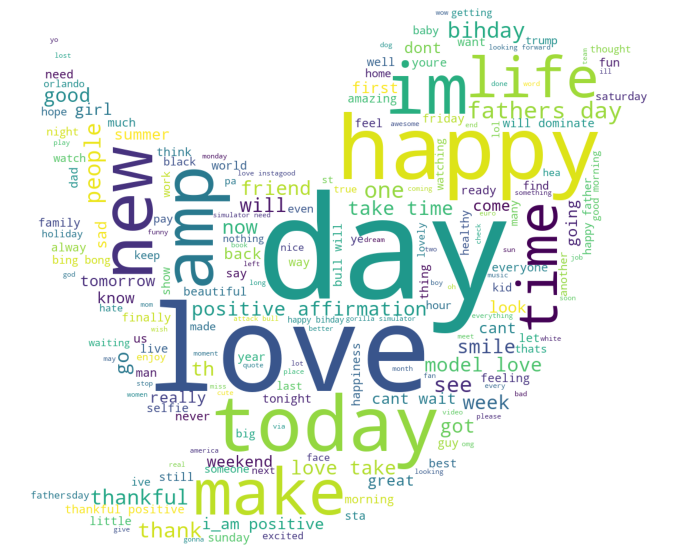

In [34]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wordcloud = WordCloud(background_color='white', height=2500, width=5000, random_state=100, mask=Mask).generate(text_s)
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()